In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2

In [19]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [20]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [21]:
df.head

<bound method NDFrame.head of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [23]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [24]:
df.isnull()

Gender    Age  Height  Weight  family_history_with_overweight   FAVC  \
0      False  False   False   False                           False  False   
1      False  False   False   False                           False  False   
2      False  False   False   False                           False  False   
3      False  False   False   False                           False  False   
4      False  False   False   False                           False  False   
...      ...    ...     ...     ...                             ...    ...   
2106   False  False   False   False                           False  False   
2107   False  False   False   False                           False  False   
2108   False  False   False   False                           False  False   
2109   False  False   False   False                           False  False   
2110   False  False   False   False                           False  False   

       FCVC    NCP   CAEC  SMOKE   CH2O    SCC    FAF    TUE   CALC  MTRANS  \
0     False  False  False  False  False  False  False  False  False   False   
1     False  False  False  False  False  False  False  False  False   False   
2     False  False  False  False  False  False  False  False  False   False   
3     False  False  False  False  False  False  False  False  False   False   
4     False  False  False  False  False  False  False  False  False   False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
2106  False  False  False  False  False  False  False  False  False   False   
2107  False  False  False  False  False  False  False  False  False   False   
2108  False  False  False  False  False  False  False  False  False   False   
2109  False  False  False  False  False  False  False  False  False   False   
2110  False  False  False  False  False  False  False  False  False   False   

      NObeyesdad  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
2106       False  
2107       False  
2108       False  
2109       False  
2110       False  

[2111 rows x 17 columns]

<Axes: >

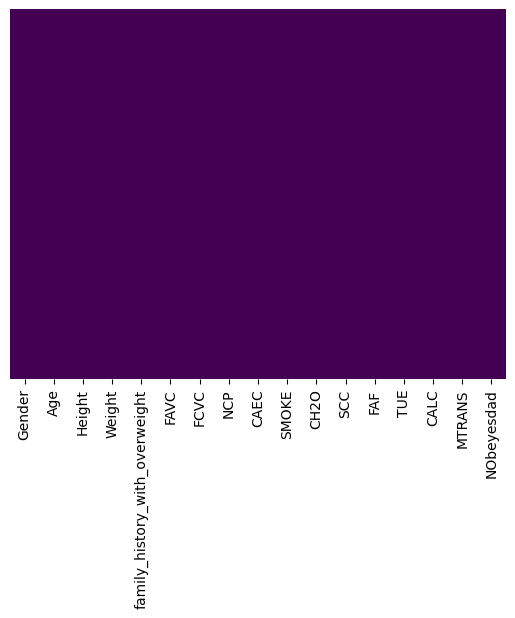

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
print("\nEDA on Obesity df\n")
print("#"*30)

print("\n Columns : \n", df.columns)
print("\n\nNumber of Columns : ", len(df.columns))
print("\nNumber of Rows : ",len(df.columns))
print("\n\nData Types :\n", df.dtypes)

print("\n Contains NaN/Empty cells : ", df.isnull().values.any())

print("\n Total empty cells by column :\n", df.isnull().sum(), "\n\n")


EDA on Obesity df

##############################

 Columns : 
 Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


Number of Columns :  17

Number of Rows :  17


Data Types :
 Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                   

In [30]:
import pandas_profiling

In [31]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
df.describe(include='all',percentiles=[.01,.05,.25,.5,.75,.90,.99]).T 

count unique                    top  freq  \
Gender                            2111      2                   Male  1068   
Age                             2111.0    NaN                    NaN   NaN   
Height                          2111.0    NaN                    NaN   NaN   
Weight                          2111.0    NaN                    NaN   NaN   
family_history_with_overweight    2111      2                    yes  1726   
FAVC                              2111      2                    yes  1866   
FCVC                            2111.0    NaN                    NaN   NaN   
NCP                             2111.0    NaN                    NaN   NaN   
CAEC                              2111      4              Sometimes  1765   
SMOKE                             2111      2                     no  2067   
CH2O                            2111.0    NaN                    NaN   NaN   
SCC                               2111      2                     no  2015   
FAF                             2111.0    NaN                    NaN   NaN   
TUE                             2111.0    NaN                    NaN   NaN   
CALC                              2111      4              Sometimes  1401   
MTRANS                            2111      5  Public_Transportation  1580   
NObeyesdad                        2111      7         Obesity_Type_I   351   

                                     mean        std   min         1%  \
Gender                                NaN        NaN   NaN        NaN   
Age                               24.3126   6.345968  14.0  16.508464   
Height                           1.701677   0.093305  1.45   1.500199   
Weight                          86.586058  26.191172  39.0       42.0   
family_history_with_overweight        NaN        NaN   NaN        NaN   
FAVC                                  NaN        NaN   NaN        NaN   
FCVC                             2.419043   0.533927   1.0        1.0   
NCP                              2.685628   0.778039   1.0        1.0   
CAEC                                  NaN        NaN   NaN        NaN   
SMOKE                                 NaN        NaN   NaN        NaN   
CH2O                             2.008011   0.612953   1.0        1.0   
SCC                                   NaN        NaN   NaN        NaN   
FAF                              1.010298   0.850592   0.0        0.0   
TUE                              0.657866   0.608927   0.0        0.0   
CALC                                  NaN        NaN   NaN        NaN   
MTRANS                                NaN        NaN   NaN        NaN   
NObeyesdad                            NaN        NaN   NaN        NaN   

                                       5%        25%       50%         75%  \
Gender                                NaN        NaN       NaN         NaN   
Age                             17.891428  19.947192  22.77789        26.0   
Height                           1.548291       1.63  1.700499    1.768464   
Weight                               48.5  65.473343      83.0  107.430682   
family_history_with_overweight        NaN        NaN       NaN         NaN   
FAVC                                  NaN        NaN       NaN         NaN   
FCVC                             1.523214        2.0  2.385502         3.0   
NCP                                   1.0   2.658738       3.0         3.0   
CAEC                                  NaN        NaN       NaN         NaN   
SMOKE                                 NaN        NaN       NaN         NaN   
CH2O                                  1.0   1.584812       2.0     2.47742   
SCC                                   NaN        NaN       NaN         NaN   
FAF                                   0.0   0.124505       1.0    1.666678   
TUE                                   0.0        0.0   0.62535         1.0   
CALC                                  NaN        NaN       NaN         NaN   
MTRANS                                NaN        NaN       NaN   

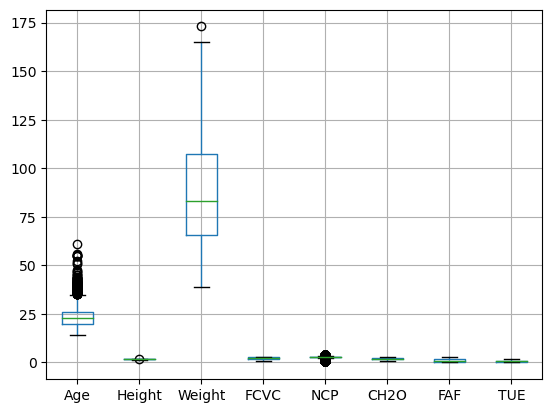

In [33]:
df.boxplot()
plt.show()

In [34]:
print(df['Age'].quantile(0.01))
print(df['Age'].quantile(0.99))
print(df['Height'].quantile(0.01))
print(df['Height'].quantile(0.99))
print(df['Weight'].quantile(0.01))
print(df['Weight'].quantile(0.99))

16.5084639
43.58386630000001
1.5001993
1.9090553000000001
42.0
150.33339780000003


count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

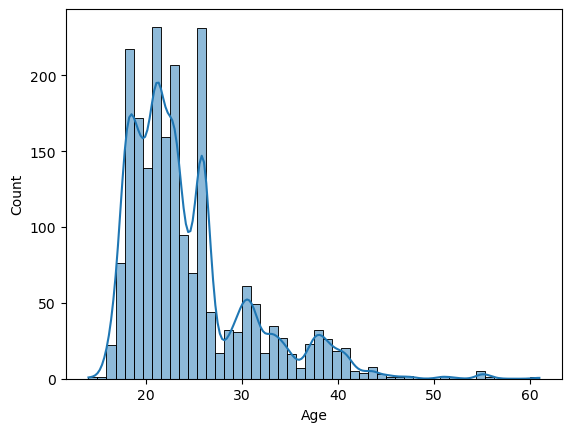

In [36]:
sns.histplot(df['Age'], kde=True, kde_kws={"bw_adjust": 0.5})
df['Age'].describe()

count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64

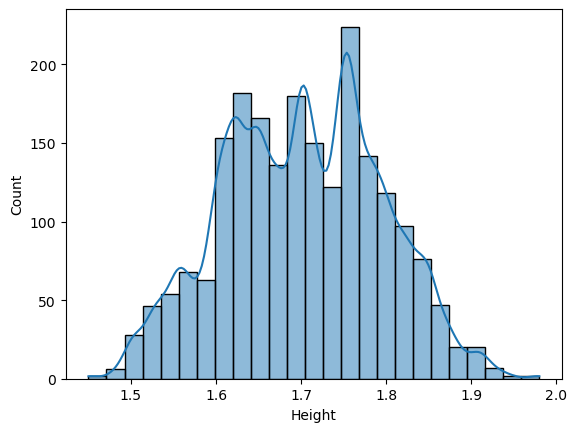

In [37]:
sns.histplot(df['Height'], kde=True, kde_kws={"bw_adjust": 0.5})
df['Height'].describe()

count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64

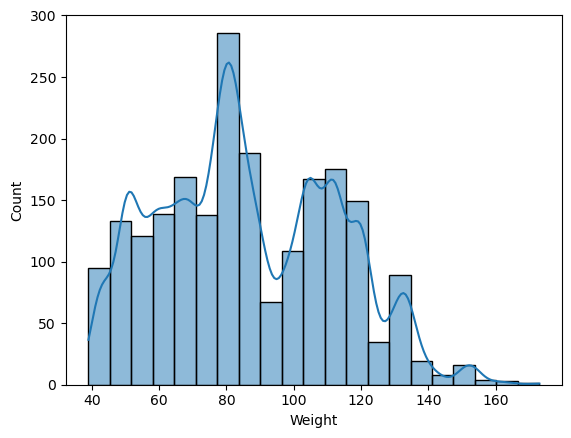

In [38]:
sns.histplot(df['Weight'], kde=True, kde_kws={"bw_adjust": 0.5})
df['Weight'].describe()

In [39]:
for i in df.columns:
    print(i,"  ",df[i].dtype)


Gender    object
Age    float64
Height    float64
Weight    float64
family_history_with_overweight    object
FAVC    object
FCVC    float64
NCP    float64
CAEC    object
SMOKE    object
CH2O    float64
SCC    object
FAF    float64
TUE    float64
CALC    object
MTRANS    object
NObeyesdad    object


In [40]:
df.count()

Gender                            2111
Age                               2111
Height                            2111
Weight                            2111
family_history_with_overweight    2111
FAVC                              2111
FCVC                              2111
NCP                               2111
CAEC                              2111
SMOKE                             2111
CH2O                              2111
SCC                               2111
FAF                               2111
TUE                               2111
CALC                              2111
MTRANS                            2111
NObeyesdad                        2111
dtype: int64

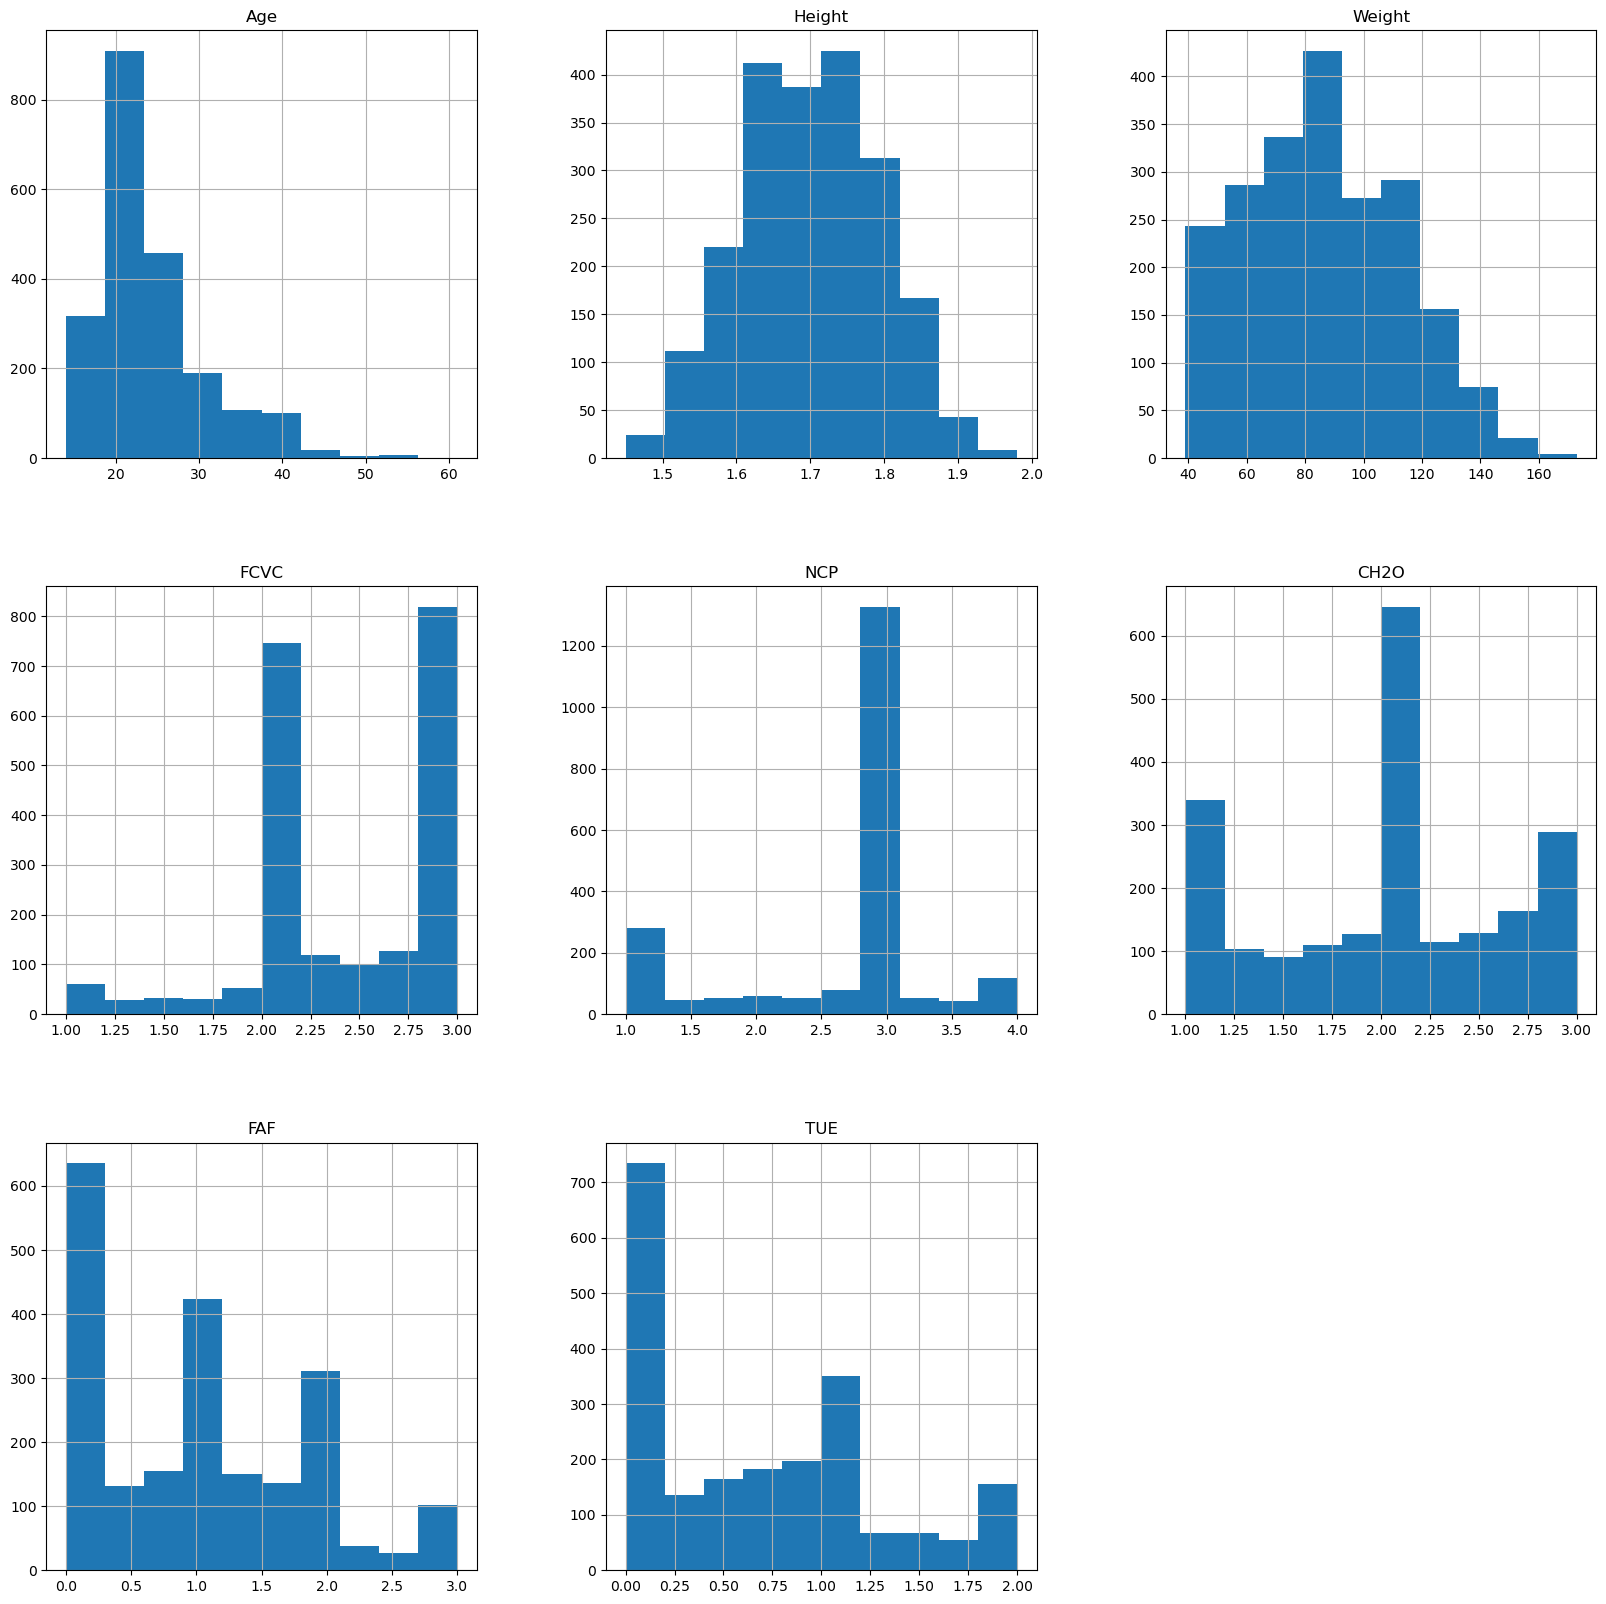

In [41]:
p = df.hist(figsize = (20,20))